# MDCT Analysis and Synthesis

In [ ]:
from DCT4 import *
from Fafoldingmatrix import *
from polmatmult import *
from x2polyphase import *
from polyphase2x import *


In [ ]:
# Imports
import soundfile as sf
import io
import librosa
from six.moves.urllib.request import urlopen
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

# Import extra packages below here if needed.


MDCT Sine Window:





In [ ]:
def mdct_sine_window(N):
    """
    This function computes a MDCT Sine Window depending on the number of subbbands N.
    
    Parameters:
    -----------
    N : int - The number of subbands.
    
    Returns:
    -------
    h : array - The coefficients of the MDCt sine window.
    """

    h=np.sin(np.pi/(2*N)*(np.arange(2*N)+0.5))

    return h

Complete the function below to calculate the Folding Matrix Fa.

In [ ]:
def fa_matrix(h):
    """
    This function takes the coefficients 'h' of an MDCT sine window and computes the matrix Fa.
    
    Parameters:
    -----------
    h : array - The coefficients of the MDCt sine window.
    
    Returns:
    -------
    Fa : array - The folding matrix Fa.
    """

    N = int(len(h)/2);
    print("Famatrix N=", N)
    #fliplr:
    h=h[::-1]
    Fa=np.zeros((N,N,1))
    Fa[0:int(N/2),0:int(N/2),0]=-np.fliplr(np.diag(h[0:int(N/2)]))
    Fa[int(N/2):N,0:int(N/2),0]=-np.diag(h[int(N/2):N])
    Fa[0:int(N/2),int(N/2):N,0]=-np.diag(h[N:(N+int(N/2))])
    Fa[int(N/2):N,int(N/2):N,0]=np.fliplr(np.diag(h[(N+int(N/2)):2*N]))

    return Fa

In [ ]:
def delay_matrix(N):
    """
    This function computes the delay_matrix D(z) according to the number os subbands N.
    
    Paramenters:
    ------------
    N : int - The number of subbabds
    
    Returns:
    --------
    Dp : array - The delay matrix.
    """

    Dp=np.zeros((N,N,2))
    Dp[:,:,0]=np.diag(np.hstack((np.zeros(int(N/2)),np.ones(int(N/2)))))
    Dp[:,:,1]=np.diag(np.hstack((np.ones(int(N/2)),np.zeros(int(N/2)))))

    return Dp

In [ ]:
def faz_matrix(Fa, Dp):
    """
    This function computes the Faz matrix: Fa * D(z)
    
    Parameters:
    -----------
    Fa : array - The Fa matrix.
    Dp : array - The Delay matrix D(z)
    
    Returns:
    --------
    Faz : array - The Faz matrix Fa * D(z).
    """

    Faz=polmatmult(Fa,Dp)

    return Faz

In [ ]:
def compute_yp(x,N, Faz):
    """
    This function calculates 'yp' which is the polynomial multiplication of 'xp' the polyphase row vector of the input signal 'x' for blocks of length N with the Faz matrix.
    
    Parameters:
    -----------
    x : array - The input row vector.
    N : int - The length of blocks.
    Faz : array - Faz matrix: Fa * D(z)
    
    Returns:
    -------
    yp : array - The polynomial multiplication of 'xp' with 'Faz'
    """

    xp=x2polyphase(x,N)
    yp=polmatmult(xp,Faz)
    return yp
    

In [ ]:
def dct4_yp(yp):
    """
    This function applies the DCT4 transform to the 'yp' array.
    
    Paramenters:
    ------------
    yp : array. The 'yp' array.
    
    Returns:
    --------
    yp : array. The DCT4 transformed 'yp' array.
    """

    for m in range(yp.shape[2]):
        yp[0,:,m]=DCT4(yp[0,:,m])
    return yp

Run the next cell to plot the MDCT Spectrogram of your solution for visual inspection.

Famatrix N= 512
L=  1291


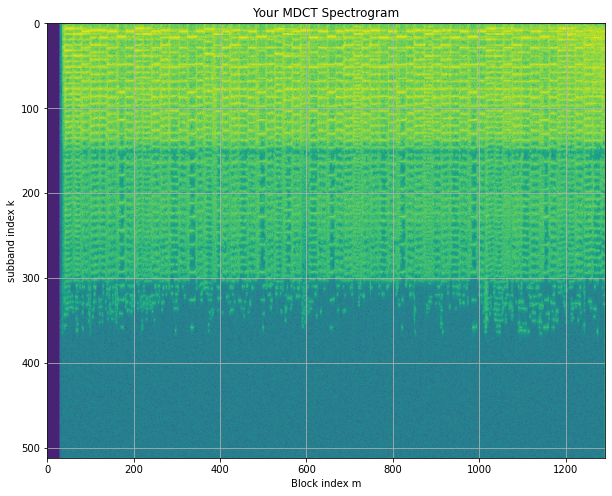

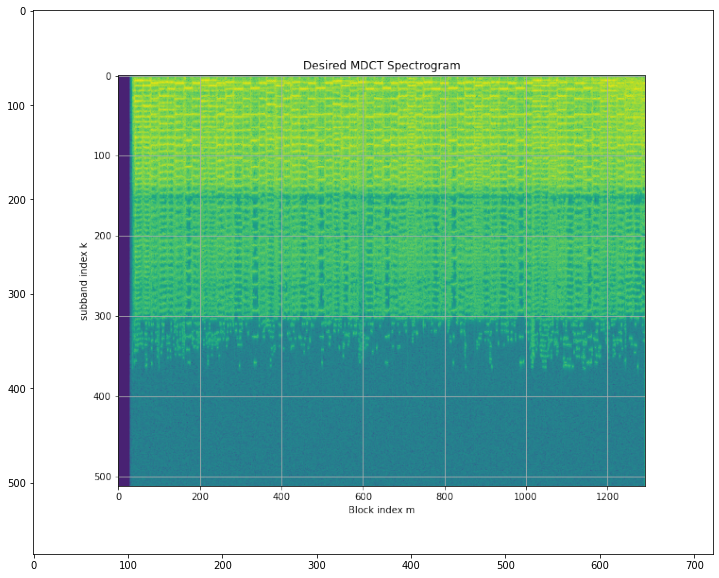

In [ ]:
h_s = mdct_sine_window(N)
fa_s = fa_matrix(h_s)
delay_s= delay_matrix(N)
faz_s = faz_matrix(fa_s, delay_s)
yp_s = compute_yp(x,N, faz_s)
yp_dct4_s = dct4_yp(yp_s)
#Resulting spectrogram image:
fig = plt.figure(figsize=(10,8))
plt.imshow(np.log(abs((yp_dct4_s[0,:,:]+1e-9))), aspect='auto')
plt.title('Your MDCT Spectrogram')
plt.ylabel('subband index k')
plt.xlabel('Block index m')
plt.grid()

plt.figure(figsize=(14,10))
plt.imshow(plt.imread('desired_%s.png'%N));

Complete the function below to Compute the inverse folding matrix for the Synthesis:

In [ ]:
def inverse_folding_matrix(Fa):
    """
    This functions compute the inverse folding matrix for synthesis.
    
    Parameters:
    -----------
    fa : array - The folding matrix Fa.
    
    Returns:
    --------
    Fs : array - The inverse folding matrix.
    """

    Fs=np.zeros(Fa.shape)
    Fs[:,:,0]=np.linalg.inv(Fa[:,:,0])

    return Fs

Complete the function below to reconstruct the audio data from the 'yp' array.

In [ ]:
def reconstruct_x(yp):
    """
    This function reconstruct the audio data xrek from the array 'yp'.
    
    Paramenters:
    ------------
    yp : array. The 'yp' array.
    
    Returns:
    --------
    xrek : array. The reconstructed audio data from 'yp'
    """

    h_s = mdct_sine_window(512)
    fa_s = fa_matrix(h_s)
    Fs = inverse_folding_matrix(fa_s)
    
    
    
    
    
    L=yp.shape[2]
    N=512
    
    
    #Apply DCT4 (inverse) transform to the rows:
    for m in range(L):
        yp[0,:,m]=DCT4(yp[0,:,m])
        
        
    Dpi=np.zeros((N,N,2))
    Dpi[:,:,1]=np.diag(np.hstack((np.zeros(int(N/2)),np.ones(int(N/2)))))
    Dpi[:,:,0]=np.diag(np.hstack((np.ones(int(N/2)),np.zeros(int(N/2))))) 
    
    yp=polmatmult(yp,Dpi)
    xrekp=polmatmult(yp,Fs)
    xrek=polyphase2x(xrekp)

    return xrek

Run the cells below to visualize playback the reconstructed signal for inspection.

In [ ]:
xrek = reconstruct_x(yp_dct4_s)
xrek = xrek[0,:]

Famatrix N= 512


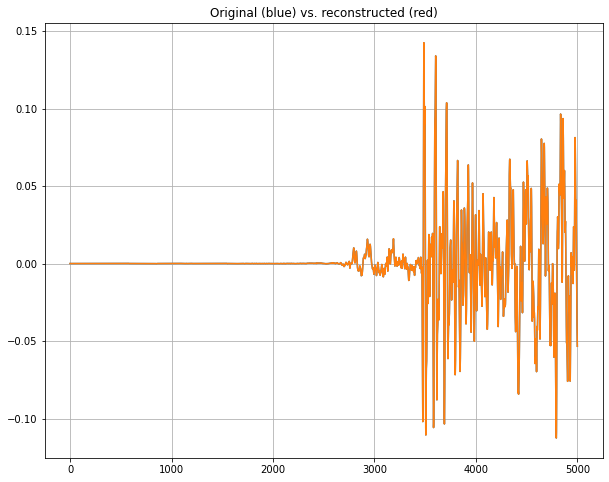

In [ ]:
display(ipd.Audio(xrek, rate=sr))
plt.figure(figsize=(10,8))
if N==2048:
    plt.plot(x[150000:200000])
    plt.plot(xrek[N+150000:200000+N])
else:
    plt.plot(x[15000:20000])
    plt.plot(xrek[N+15000:20000+N])
plt.title('Original (blue) vs. reconstructed (red)')
plt.grid()